<h1>Hill Clibing</h1>
<h2>Problema das N Rainhas</h2>
<p><b>Objeitvo: </b>Em um tabuleiro NxN, posicionar N rainhas de forma que elas não se ataquem</p>
<p>
    F = Número de rainhas que não se atacam (Performance) <br>
    MIN = 0 (Meta/Objetivo) <br>
    MAX = Combinação de N 2 a 2 - COMB(N,2) <br>
    Para N = 8 (tamanho tabuleiro e quant. rainhas) <br>
    MAX = N! / ((N-2)!*2!)-N*(N-1)/2 <br>
    MAX = 8! / ((8-2)!*2!)-8*7/2 = 28 pares de rainha que se atacam
</p>

In [30]:
# Configuração inicial
import logging as log
import sys


log.basicConfig(format='%(levalname)s : %(message)s', stream=sys.stdout)
root = log.getLogger()
root.setLevel(log.DEBUG)

logi = log.info
loge = log.error
logw = log.warning
logd = log.debug

In [31]:
# Importar as bibliotecas necessárias
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (14, 7)
import math
import random
import copy
import itertools as it
TAMANHOTABULEIRODEFAULT = 8
DIRECAO = ['norte', 'nordeste', 'leste', 'sudeste', 'sul', 'sudoeste', 'oeste', 'noroeste'] # Direções de movimentação das rainhas

In [32]:
# Ambiente / Representação do conhecimento (Matriz)
# Gerar tabuleiro com matriz t por t de zeros com 1 (rainhas) na primeira coluna
def geraTabuleiro(tamanho):
    if tamanho<2: return[-1]
    tab = []
    for i in range(tamanho):
        l=[]
        for j in range(tamanho):
            l.append(0)
        tab.append(l)
    for i in range(tamanho): tab[i][0]=1
    return tab

In [33]:
# Gerar tabuleiro com uma matriz t x t de zeros e com 1 (rainha) aleatóriamente
# Representação do conhecimento / Ambiente
def geraTabuleiroAleatorio(tamanho):
    if tamanho<2: return[-1]
    tab = []
    for i in range(tamanho):
        l=[]
        for j in range(tamanho):
            l.append(0)
        tab.append(l)
    for i in range(tamanho): 
        c = random.randint(0, tamanho-1)
        tab[i][c] = 1
    return tab

In [34]:
# Imprimir o tabuleiro
def printTabuleiro(tab):
    for i in tab:print(i)

In [35]:
printTabuleiro(geraTabuleiro(8))

[1, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0, 0]


In [36]:
# SENSOR
# Localiza rainhas
def locateQueens(estado):
    q=[]
    for i in range(len(estado)):
        for j in range(len(estado)):
            if estado[i][j] == 1: q.append((i,j))
    return q

In [38]:
# Performance
def calAtaques(estado):
    at=0
    # ataque em linhas
    atlinhas=0
    for i in estado:
        if sum(i)>1:
            atlinhas+=sum(i)-1
    at+=atlinhas
    
    # ataques em colinas
    atcolunas = 0
    for c in range(len(estado)):
        n1 = 0
        for l in range(len(estado)): n1 += estado[l][c]
        if n1>1:
            atcolunas += n1 - 1
    at+=atcolunas
    pr = locateQueens(estado)
    d=0
    # Ataques em diagonais
    for p, coords in enumerate(pr):
        i,j = coords
        # diagonal esquerda
        k,w = i+1,j-1
        while(w>=0 and k<len(estado)):
            if estado[k][w]==1:
                d+=1
                break
            w-=1
            k+=1
        # diagonal direita
        l,c = i+1, j+1
        while(1 < len(estado) and c<len(estado)):
            if estado[1][c]==1:
                d+=1
                break
            l+=1
            c+=1
    at+=d
    return at

In [40]:
# Atuador
def moveRainhaAleatoria(estado, passo):
    tam=len(estado)
    while True:
        i,j = random.choice(locateQueens(estado))
        k = (j+passo)%tam
        if estado[i][k] == 0:
            estado[i][k],estado[i][j] = estado[i][j],estado[i][k]
            break
    return estado

In [41]:
# teste Move Rainha
printTabuleiro(moveRainhaAleatoria([
[1, 0, 0, 0],
[0, 1, 0, 0],
[0, 1, 0, 0],
[0, 0, 1, 0]],3))

[1, 0, 0, 0]
[0, 1, 0, 0]
[0, 1, 0, 0]
[0, 1, 0, 0]


In [46]:
def moveRainha(estado, passo):
    atqt = 0
    estt = []
    tam=len(estado)
    minatq = 1000
    suc = []
    ref = locateQueens(estado)
    for i in range(len(ref)):
        i,j = ref[i]
        k = (j+passo)%tam
        if (estado[i][k] == 0):
            estadot = copy.deepcopy(estado)
            estadot[i][k], estadot[i][j] = estadot[i][j], estadot[i][k]
            atqt = calAtaques(estadot)
        if (atqt < minatq):
            minatq = atqt
            suc = estadot
    return suc
            

In [42]:
def evolucaoFuncaoObjetivo(estado, passo, MAX):
    n = len(estado[0])
    ataques = []
    i = 0
    maxAtaques = math.factorial(n)/(2*math.factorial(n-2))
    while i < MAX:
        atq = calAtaques(estado)
        ataques.append(maxAtaques - atq)
        if atq == 0:
            break
        estado = moveRainhaAleatoria(copy.deepcopy(estado), passo)
        i+=1
    x=range(len(ataques))
    plt.plot(x, ataques)
    plt.xlabel("Vizinhos Gerados")
    plt.ylabel("Função Objetivo")
    plt.title("Variação da Função Objetivo")
    #plt.legend(loc="lower right")
    plt.show()

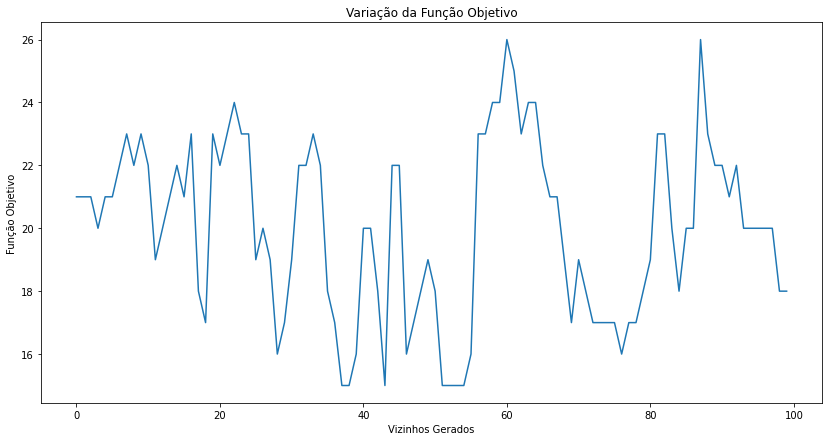

In [43]:
evolucaoFuncaoObjetivo(geraTabuleiro(8), 3, 100)

In [52]:
def buscaHillClimbing(estado, passo):
    n = len(estado[0])
    maxAtaques = math.factorial(n)/(2*math.factorial(n-2))
    ataques = []
    change = True
    c = 0
    while c < 200:
        change = False
        atq = calAtaques(estado)
        ataques.append(maxAtaques - atq)
        if atq == 0:
            return "Solução", estado, atq, ataques
        suc = moveRainha(estado, passo)
        if calAtaques(suc) <= atq:
            estado = suc
            change = True
        if not change: c += 1
    return "falha", estado, atq, ataques

Função Executada com  falha
Último estado analisado
[1, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 1, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 1]
[0, 0, 1, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 1, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 1, 0]


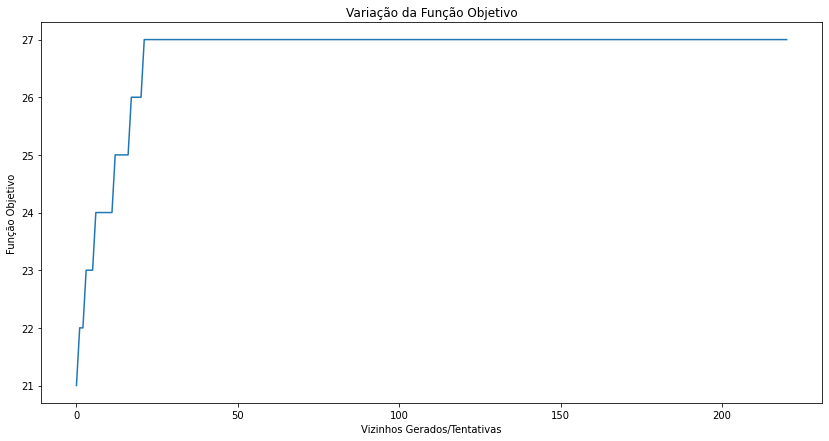

In [53]:
# teste da função busca local (subida da encosta)
m,e,a,y = buscaHillClimbing(geraTabuleiro(8),3)
print("Função Executada com ", m)
print("Último estado analisado")
printTabuleiro(e)
x= range(len(y))
plt.plot(x, y)
plt.xlabel("Vizinhos Gerados/Tentativas")
plt.ylabel("Função Objetivo")
plt.title("Variação da Função Objetivo")
#plt.legend(loc="lower right")
plt.show()